# AstroMiNN in Hyrax Example
This notebook demonstrates instantiation of the AstroMiNN model within the context of Hyrax.
It shows simple training and inference with the PyTorch-based model. Conversion to ONNX, and a simple execution of the ONNX model on the same data used for inference.

In [1]:
from hyrax import Hyrax

# Note: You may need to update the directory paths in the config file to point to
# the correct locations of sample data.

h = Hyrax(config_file='./astrominn_example_config.toml')

Runtime config contains key or section 'train' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml
Runtime config contains key or section 'infer' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


In [2]:
# This is an example of instantiating the dataset to be used for training
ds = h.prepare()

/Users/drew/opt/miniconda3/envs/applecider/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
[2025-12-19 12:22:57,698 hyrax.prepare:INFO] Finished Prepare


In [3]:
# Display a sample from the training dataset
ds['train'][10_431]

{'data': {'image': tensor([[[ 1.2763e-02,  1.1431e-02,  1.3430e-02,  ...,  1.1287e-02,
             1.1328e-02,  1.1790e-02],
           [ 1.3470e-02,  1.1499e-02,  1.3248e-02,  ...,  1.2113e-02,
             1.2017e-02,  1.2453e-02],
           [ 1.2818e-02,  1.2108e-02,  1.1506e-02,  ...,  1.2937e-02,
             1.1989e-02,  1.1693e-02],
           ...,
           [ 1.0970e-02,  1.2625e-02,  1.1765e-02,  ...,  1.2426e-02,
             1.1231e-02,  1.1803e-02],
           [ 1.1595e-02,  1.1256e-02,  1.2803e-02,  ...,  1.2143e-02,
             1.2465e-02,  1.1800e-02],
           [ 1.1051e-02,  1.2136e-02,  1.2449e-02,  ...,  1.2246e-02,
             1.2759e-02,  1.2415e-02]],
  
          [[ 1.2624e-02,  1.2601e-02,  1.2588e-02,  ...,  1.1761e-02,
             1.1657e-02,  1.1673e-02],
           [ 1.2313e-02,  1.2494e-02,  1.2572e-02,  ...,  1.1864e-02,
             1.1915e-02,  1.1993e-02],
           [ 1.2375e-02,  1.2242e-02,  1.2348e-02,  ...,  1.1903e-02,
             1.1910e-

In [4]:
# Here we train the AstroMiNN model, note that we'll only train for a few epochs.
# NOTE: There are two ways to update the config values programmatically - either directly, or by using `set_config()`.
h.config['train']['epochs'] = 10
h.set_config('model.AstroMiNN.use_probabilities', False)  # The loss function uses logits for training

m = h.train()  # Returns an instance of the trained model with weights

[2025-12-19 12:22:57,731 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-12-19 12:22:57,731 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-12-19 12:23:00,211 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-12-19 12:23:00,212 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-12-19 12:23:02,399 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-12-19 12:23:02,400 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-12-19 12:23:02,400 hyrax.verbs.train:INFO] Training model: AstroMiNN
[2025-12-19 12:23:02,401 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: applecid

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

  5%|4         | 1/21 [00:00<?, ?it/s]

[2025-12-19 12:29:09,543 hyrax.pytorch_ignite:INFO] Total training time: 366.88[s]
2025/12/19 12:29:09 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/12/19 12:29:09 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-12-19 12:29:09,879 hyrax.verbs.train:INFO] Finished Training


In [5]:
# Here we run inference using the trained model.
# NOTE: Hyrax will use the weights from the most recently trained model output directory for inference.
h.set_config('model.AstroMiNN.use_probabilities', True)  # For inference we want probabilities as output.

infer_ds = h.infer()  # Returns an instances of the result dataset

[2025-12-19 12:29:09,922 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-12-19 12:29:09,922 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-12-19 12:29:09,924 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-12-19 12:29:09,924 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-12-19 12:29:13,078 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.01, 'momentum': 0.9}.
[2025-12-19 12:29:13,079 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2025-12-19 12:29:13,080 hyrax.verbs.infer:INFO] Inference model: AstroMiNN
[2025-12-19 12:29:13,080 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: applec

 10%|#         | 1/10 [00:00<?, ?it/s]

[2025-12-19 12:29:16,395 hyrax.pytorch_ignite:INFO] Total evaluation time: 2.71[s]
[2025-12-19 12:29:16,411 hyrax.verbs.infer:INFO] Inference Complete.


## Convert to ONNX and predict with Hyrax `engine`
We'll take the trained PyTorch model and provide sample data in order to convert to an ONNX representation.
Then we'll attempt to pass the same data used for inference above through the ONNX model.

Note: At this time, the mixture of experts in the forward function is difficult for the ONNX converter to process.
As such, processing data with engine is unlikely to work. 

In [7]:
# We can use Hyrax to export the trained model to ONNX format for interoperability.
# The resulting ONNX model will be saved in a timestamped `onnx` output directory.

h.to_onnx()

[2025-12-19 12:58:39,010 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2025-12-19 12:58:39,010 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2025-12-19 12:58:39,011 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2025-12-19 12:58:39,011 hyrax.config_utils:INFO] Merging external default config from /Users/drew/code/applecider/src/applecider/default_config.toml
[2025-12-19 12:58:39,216 hyrax.config_utils:WARNING] Runtime config contains key or section 'train' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml
[2025-12-19 12:58:39,216 hyrax.config_utils:WARNING] Runtime config contains key or section 'infer' which has no default defined. All configuration keys and sections must be defined in /Users/drew/code/hyrax/src/hyrax/hyrax_default_config.toml
[2025-12-19 12:58:40,827 hyrax.models.mo

In [8]:
# Finally we can use Hyrax `engine` to run the inference dataset through the ONNX model.
# The results will be saved in a timestamped `engine` output directory.
h.engine()

## Example confusion matrix

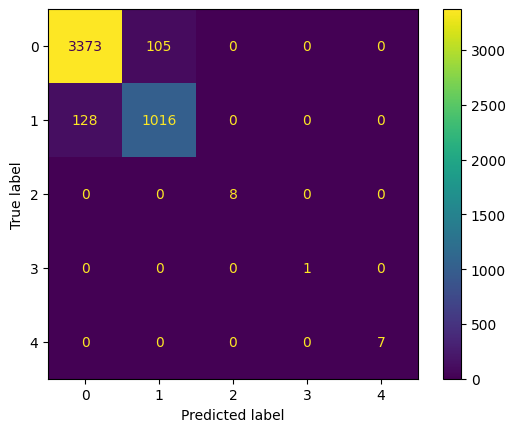

In [6]:
# Simple example of checking results after running Hyrax `infer`.
# Here we will look at the output of inference, and save the object id and highest probability class.
# We'll also load the corresponding input file and get the class id from that.
# Then we can create a confusion matrix from the results.

import numpy as np
import glob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

res_list = []

# TODO: Update this number to be the number of batches generated during inference
for i in range(10):
    # TODO: Update this path to point to the correct output directory
    a = np.load(f"/Users/drew/code/applecider/docs/pre_executed/testing/results/20251219-122909-infer-2m73/batch_{i}.npy")

    for i in a:
        max_ind = np.argmax(i['tensor'])
        res_list.append((str(i['id']), int(max_ind)))

CLASSES = [
    ['SN Ia','SN Ic','SN Ib'],
    ['SN IIP', 'SN IIn','SN II', 'SN IIb'],
    ['Cataclysmic'],
    ['AGN'],
    ['Tidal Disruption Event']
]

real_class = []
pred_class = []
for k, v in res_list:
    #TODO: Update this point to the correct data directory
    files = glob.glob(f"/Users/drew/code/applecider/data/preprocessed_ztf_alerts/{k}*.npy")
    b = np.load(files[0], allow_pickle=True)

    pred_class.append(v)

    target = b.item().get('target')

    for i, c in enumerate(CLASSES):
        if target in c:
            target_class = i
            break

    real_class.append(target_class)

ConfusionMatrixDisplay(confusion_matrix(real_class, pred_class)).plot()

## Quick comparison of results
We can compare the output of inference with PyTorch vs ONNX.

Note that the output of inference was run through a Torch softmax function, while the ONNX model was not. So in this example, we process the engine output with Torch's softmax and print the two predicted values together for each of 10 examples.

In [19]:
import numpy as np
import torch
import torch.nn.functional as F

infer_output = np.load("/Users/drew/code/applecider/docs/pre_executed/testing/results/20251219-122909-infer-2m73/batch_0.npy", allow_pickle=True)
engine_output = np.load("/Users/drew/code/applecider/docs/pre_executed/testing/results/20251219-125858-engine-3a7z/batch_0.npy", allow_pickle=True)

engine_tensor_output = torch.tensor(engine_output['tensor'][0:10])

for ind, i in enumerate(infer_output[0:10]):
    print(f"id: {i['id']}")
    print(f"\tPyTorch: {i['tensor']}")
    print(f"\tONNX:    {F.softmax(engine_tensor_output[ind], dim=-1).numpy()}")

id: ZTF24aaaaxft
	PyTorch: [9.9992514e-01 7.4841795e-05 2.6104818e-08 1.6782496e-11 4.0752514e-13]
	ONNX:    [9.9992514e-01 7.4841373e-05 2.6104621e-08 1.6782336e-11 4.0752051e-13]
id: ZTF24aaaaxft
	PyTorch: [9.9921656e-01 7.8348321e-04 4.6986554e-10 4.4134829e-13 1.1804037e-13]
	ONNX:    [9.9921656e-01 7.8348210e-04 4.6986459e-10 4.4135252e-13 1.1804060e-13]
id: ZTF24aaabbse
	PyTorch: [3.6179763e-01 6.3820231e-01 4.9572982e-08 5.8348741e-13 3.6498984e-11]
	ONNX:    [3.6179855e-01 6.3820148e-01 4.9572634e-08 5.8348779e-13 3.6498801e-11]
id: ZTF24aaabbse
	PyTorch: [5.4044355e-02 9.4595563e-01 1.4071913e-08 1.2628875e-13 1.3221160e-11]
	ONNX:    [5.4024786e-02 9.4597518e-01 1.4070810e-08 1.2627933e-13 1.3220124e-11]
id: ZTF24aaabbse
	PyTorch: [3.0032322e-02 9.6996766e-01 1.4886453e-09 1.7014380e-14 4.6682606e-12]
	ONNX:    [2.9977698e-02 9.7002226e-01 1.4875855e-09 1.6999087e-14 4.6632286e-12]
id: ZTF24aaabbse
	PyTorch: [9.6977770e-01 3.0222369e-02 2.6647904e-09 9.3858549e-14 1.5758522e-